<a href="https://colab.research.google.com/github/Miguel-EMC/Tarea-11/blob/main/Tarea11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONJUNTO DE EJERCICIOS


1. Encuentre las primeras dos iteraciones del método de Jacobi para los siguientes sistemas lineales, por x^0=0.

In [1]:
import numpy as np

def jacobi_iteration(A, b, x0, iterations):
    D = np.diag(np.diag(A))
    R = A - D
    D_inv = np.linalg.inv(D)

    x = x0
    for i in range(iterations):
        x = np.dot(D_inv, b - np.dot(R, x))
        print(f"Iteration {i+1}: {x}")
    return x

# a. Sistema de ecuaciones
A_a = np.array([[3, -1, 1],
                [3, 6, 2],
                [3, 3, 7]], dtype=float)
b_a = np.array([1, 0, 4], dtype=float)
x0_a = np.zeros(3)

# b. Sistema de ecuaciones
A_b = np.array([[10, -1, 0],
                [-1, 10, -2],
                [0, -2, 10]], dtype=float)
b_b = np.array([9, 7, 6], dtype=float)
x0_b = np.zeros(3)

# c. Sistema de ecuaciones
A_c = np.array([[10, 5, 0, 0],
                [5, 10, -4, 0],
                [0, -4, 8, -1],
                [0, 0, -1, 5]], dtype=float)
b_c = np.array([6, 25, -11, -11], dtype=float)
x0_c = np.zeros(4)

# d. Sistema de ecuaciones
A_d = np.array([[4, 1, 1, 1, 1],
                [-1, -3, 1, 1, 0],
                [2, 1, 5, -1, -1],
                [-1, -1, -1, 4, 0],
                [0, 2, -1, 1, 4]], dtype=float)
b_d = np.array([6, 6, 6, 6, 6], dtype=float)
x0_d = np.zeros(5)

print("Sistema a:")
jacobi_iteration(A_a, b_a, x0_a, 2)

print("\nSistema b:")
jacobi_iteration(A_b, b_b, x0_b, 2)

print("\nSistema c:")
jacobi_iteration(A_c, b_c, x0_c, 2)

print("\nSistema d:")
jacobi_iteration(A_d, b_d, x0_d, 2)


Sistema a:
Iteration 1: [0.33333333 0.         0.57142857]
Iteration 2: [ 0.14285714 -0.35714286  0.42857143]

Sistema b:
Iteration 1: [0.9 0.7 0.6]
Iteration 2: [0.97 0.91 0.74]

Sistema c:
Iteration 1: [ 0.6    2.5   -1.375 -2.2  ]
Iteration 2: [-0.65   1.65  -0.4   -2.475]

Sistema d:
Iteration 1: [ 1.5 -2.   1.2  1.5  1.5]
Iteration 2: [ 0.95  -1.6    1.6    1.675  2.425]


array([ 0.95 , -1.6  ,  1.6  ,  1.675,  2.425])

2.	Repita el ejercicio 1 usando el método de Gauss-Siedel.

In [2]:
import numpy as np

def gauss_seidel_iteration(A, b, x0, iterations):
    L = np.tril(A)
    U = A - L

    x = x0
    for i in range(iterations):
        x = np.dot(np.linalg.inv(L), b - np.dot(U, x))
        print(f"Iteration {i+1}: {x}")
    return x

# a. Sistema de ecuaciones
A_a = np.array([[3, -1, 1],
                [3, 6, 2],
                [3, 3, 7]], dtype=float)
b_a = np.array([1, 0, 4], dtype=float)
x0_a = np.zeros(3)

# b. Sistema de ecuaciones
A_b = np.array([[10, -1, 0],
                [-1, 10, -2],
                [0, -2, 10]], dtype=float)
b_b = np.array([9, 7, 6], dtype=float)
x0_b = np.zeros(3)

# c. Sistema de ecuaciones
A_c = np.array([[10, 5, 0, 0],
                [5, 10, -4, 0],
                [0, -4, 8, -1],
                [0, 0, -1, 5]], dtype=float)
b_c = np.array([6, 25, -11, -11], dtype=float)
x0_c = np.zeros(4)

# d. Sistema de ecuaciones
A_d = np.array([[4, 1, 1, 1, 1],
                [-1, -3, 1, 1, 0],
                [2, 1, 5, -1, -1],
                [-1, -1, -1, 4, 0],
                [0, 2, -1, 1, 4]], dtype=float)
b_d = np.array([6, 6, 6, 6, 6], dtype=float)
x0_d = np.zeros(5)

print("Sistema a:")
gauss_seidel_iteration(A_a, b_a, x0_a, 2)

print("\nSistema b:")
gauss_seidel_iteration(A_b, b_b, x0_b, 2)

print("\nSistema c:")
gauss_seidel_iteration(A_c, b_c, x0_c, 2)

print("\nSistema d:")
gauss_seidel_iteration(A_d, b_d, x0_d, 2)

Sistema a:
Iteration 1: [ 0.33333333 -0.16666667  0.5       ]
Iteration 2: [ 0.11111111 -0.22222222  0.61904762]

Sistema b:
Iteration 1: [0.9   0.79  0.758]
Iteration 2: [0.979  0.9495 0.7899]

Sistema c:
Iteration 1: [ 0.6    2.2   -0.275 -2.255]
Iteration 2: [-0.5       2.64     -0.336875 -2.267375]

Sistema d:
Iteration 1: [ 1.5     -2.5      1.1      1.525    2.64375]
Iteration 2: [ 0.8078125  -1.39427083  1.98947917  1.85075521  2.23181641]


array([ 0.8078125 , -1.39427083,  1.98947917,  1.85075521,  2.23181641])

3. Utilice el método de Jacobi para resolver los sistemas lineales en el ejercicio 1, con TOL = 10-3.

In [3]:
import numpy as np

def jacobi_method(A, b, x0, tol, max_iterations=1000):
    D = np.diag(np.diag(A))
    R = A - D
    D_inv = np.linalg.inv(D)

    x = x0
    for i in range(max_iterations):
        x_new = np.dot(D_inv, b - np.dot(R, x))
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, i+1
        x = x_new
    return x, max_iterations

# a. Sistema de ecuaciones
A_a = np.array([[3, -1, 1],
                [3, 6, 2],
                [3, 3, 7]], dtype=float)
b_a = np.array([1, 0, 4], dtype=float)
x0_a = np.zeros(3)

# b. Sistema de ecuaciones
A_b = np.array([[10, -1, 0],
                [-1, 10, -2],
                [0, -2, 10]], dtype=float)
b_b = np.array([9, 7, 6], dtype=float)
x0_b = np.zeros(3)

# c. Sistema de ecuaciones
A_c = np.array([[10, 5, 0, 0],
                [5, 10, -4, 0],
                [0, -4, 8, -1],
                [0, 0, -1, 5]], dtype=float)
b_c = np.array([6, 25, -11, -11], dtype=float)
x0_c = np.zeros(4)

# d. Sistema de ecuaciones
A_d = np.array([[4, 1, 1, 1, 1],
                [-1, -3, 1, 1, 0],
                [2, 1, 5, -1, -1],
                [-1, -1, -1, 4, 0],
                [0, 2, -1, 1, 4]], dtype=float)
b_d = np.array([6, 6, 6, 6, 6], dtype=float)
x0_d = np.zeros(5)

tol = 1e-3

print("Sistema a:")
x_a, iter_a = jacobi_method(A_a, b_a, x0_a, tol)
print(f"Solución: {x_a}, Iteraciones: {iter_a}")

print("\nSistema b:")
x_b, iter_b = jacobi_method(A_b, b_b, x0_b, tol)
print(f"Solución: {x_b}, Iteraciones: {iter_b}")

print("\nSistema c:")
x_c, iter_c = jacobi_method(A_c, b_c, x0_c, tol)
print(f"Solución: {x_c}, Iteraciones: {iter_c}")

print("\nSistema d:")
x_d, iter_d = jacobi_method(A_d, b_d, x0_d, tol)
print(f"Solución: {x_d}, Iteraciones: {iter_d}")

Sistema a:
Solución: [ 0.03510079 -0.23663751  0.65812732], Iteraciones: 9

Sistema b:
Solución: [0.995725 0.957775 0.79145 ], Iteraciones: 6

Sistema c:
Solución: [-0.79710581  2.79517067 -0.25939578 -2.25179299], Iteraciones: 21

Sistema d:
Solución: [ 0.24153745 -0.78416425  2.01971649  1.86935059  1.92933646], Iteraciones: 12


4.	Utilice el método de Gauss-Siedel para resolver los sistemas lineales en el ejercicio 1, con TOL = 10-3.

In [4]:
import numpy as np

def gauss_seidel_method(A, b, x0, tol, max_iterations=1000):
    n = len(b)
    x = x0.copy()

    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k+1
        x = x_new

    return x, max_iterations

# a. Sistema de ecuaciones
A_a = np.array([[3, -1, 1],
                [3, 6, 2],
                [3, 3, 7]], dtype=float)
b_a = np.array([1, 0, 4], dtype=float)
x0_a = np.zeros(3)

# b. Sistema de ecuaciones
A_b = np.array([[10, -1, 0],
                [-1, 10, -2],
                [0, -2, 10]], dtype=float)
b_b = np.array([9, 7, 6], dtype=float)
x0_b = np.zeros(3)

# c. Sistema de ecuaciones
A_c = np.array([[10, 5, 0, 0],
                [5, 10, -4, 0],
                [0, -4, 8, -1],
                [0, 0, -1, 5]], dtype=float)
b_c = np.array([6, 25, -11, -11], dtype=float)
x0_c = np.zeros(4)

# d. Sistema de ecuaciones
A_d = np.array([[4, 1, 1, 1, 1],
                [-1, -3, 1, 1, 0],
                [2, 1, 5, -1, -1],
                [-1, -1, -1, 4, 0],
                [0, 2, -1, 1, 4]], dtype=float)
b_d = np.array([6, 6, 6, 6, 6], dtype=float)
x0_d = np.zeros(5)

tol = 1e-3

print("Sistema a:")
x_a, iter_a = gauss_seidel_method(A_a, b_a, x0_a, tol)
print(f"Solución: {x_a}, Iteraciones: {iter_a}")

print("\nSistema b:")
x_b, iter_b = gauss_seidel_method(A_b, b_b, x0_b, tol)
print(f"Solución: {x_b}, Iteraciones: {iter_b}")

print("\nSistema c:")
x_c, iter_c = gauss_seidel_method(A_c, b_c, x0_c, tol)
print(f"Solución: {x_c}, Iteraciones: {iter_c}")

print("\nSistema d:")
x_d, iter_d = gauss_seidel_method(A_d, b_d, x0_d, tol)
print(f"Solución: {x_d}, Iteraciones: {iter_d}")

Sistema a:
Solución: [ 0.03535107 -0.23678863  0.65775895], Iteraciones: 6

Sistema b:
Solución: [0.9957475  0.95787375 0.79157475], Iteraciones: 4

Sistema c:
Solución: [-0.79691476  2.79461827 -0.25918081 -2.25183616], Iteraciones: 9

Sistema d:
Solución: [ 0.24127557 -0.78410571  2.0200189   1.86929719  1.92973328], Iteraciones: 7


5. El sistema lineal

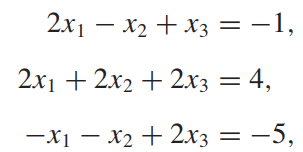


Parte A: Muestre que el método de Jacobi con x(0) = 0 falla al proporcionar una buena aproximación después de 25 iteraciones.

In [5]:
import numpy as np

def jacobi_method_fail(A, b, x0, iterations):
    D = np.diag(np.diag(A))
    R = A - D
    D_inv = np.linalg.inv(D)

    x = x0
    for i in range(iterations):
        x_new = np.dot(D_inv, b - np.dot(R, x))
        x = x_new
    return x

A = np.array([[2, -1, 1],
              [2, 2, 2],
              [-1, -1, 2]], dtype=float)
b = np.array([-1, 4, -5], dtype=float)
x0 = np.zeros(3)

iterations = 25

x_jacobi = jacobi_method_fail(A, b, x0, iterations)
print(f"Solución después de {iterations} iteraciones (Jacobi): {x_jacobi}")

Solución después de 25 iteraciones (Jacobi): [-20.82787284   2.         -22.82787284]


Parte B: Utilice el método de Gauss-Siedel con x(0) = 0:para aproximar la solución para el sistema lineal dentro de 10^(-5).

In [6]:
def gauss_seidel_method_tol(A, b, x0, tol, max_iterations=1000):
    n = len(b)
    x = x0.copy()

    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k+1
        x = x_new

    return x, max_iterations

tol = 1e-5

x_gauss_seidel, iter_gauss_seidel = gauss_seidel_method_tol(A, b, x0, tol)
print(f"Solución aproximada (Gauss-Seidel): {x_gauss_seidel}, Iteraciones: {iter_gauss_seidel}")

Solución aproximada (Gauss-Seidel): [ 1.00000226  1.9999975  -1.00000012], Iteraciones: 23


El sistema lineal
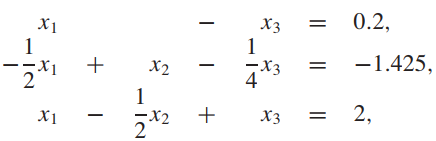

A) ¿La matriz de coeficientes
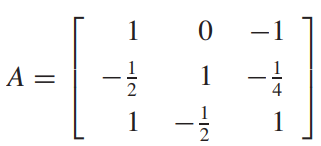

In [8]:
# Definir la matriz de coeficientes y el vector de términos independientes
A = np.array([[1, 0, -1],
              [-0.5, 1, -0.25],
              [1, -0.5, 1]])

b = np.array([0.2, -1.425, 2])

# a) Verificar si la matriz tiene diagonal estrictamente dominante
def diagonal_dominante(A):
    for i in range(len(A)):
        suma_fila = sum(abs(A[i][j]) for j in range(len(A)) if j != i)
        if abs(A[i][i]) <= suma_fila:
            return False
    return True

print("¿La matriz A tiene diagonal estrictamente dominante?", diagonal_dominante(A))

¿La matriz A tiene diagonal estrictamente dominante? False



Utilice el método iterativo de Gauss-Siedel para aproximar la solución para el sistema lineal con una tolerancia de 〖10〗_22 y un máximo de 300 iteraciones.


In [9]:
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(A)
    x = x0.copy()

    for k in range(max_iter):
        x_new = np.zeros_like(x)

        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1

        x = x_new

    return x, max_iter

# Valores iniciales, tolerancia y máximo de iteraciones
x0 = np.zeros(len(b))
tol = 1e-22
max_iter = 300

sol, iteraciones = gauss_seidel(A, b, x0, tol, max_iter)
print("Solución aproximada:", sol)
print("Iteraciones:", iteraciones)

Solución aproximada: [ 0.9 -0.8  0.7]
Iteraciones: 300


c)	¿Qué pasa en la parte b) cuando el sistema cambia por el siguiente?

In [10]:
A_cambiada = np.array([[1, 0, -2],
                       [-0.5, 1, -0.25],
                       [1, -0.5, 1]])

print("¿La nueva matriz A tiene diagonal estrictamente dominante?", diagonal_dominante(A_cambiada))

sol_cambiada, iteraciones_cambiada = gauss_seidel(A_cambiada, b, x0, tol, max_iter)
print("Solución aproximada para el sistema cambiado:", sol_cambiada)
print("Iteraciones para el sistema cambiado:", iteraciones_cambiada)

¿La nueva matriz A tiene diagonal estrictamente dominante? False
Solución aproximada para el sistema cambiado: [ 2.15687283e+41  1.34804552e+41 -1.48285007e+41]
Iteraciones para el sistema cambiado: 300


7.	Repita el ejercicio 11 usando el método de Jacobi.

In [11]:
import numpy as np

# Definir la matriz de coeficientes y el vector de términos independientes
A = np.array([[1, 0, -1],
              [-0.5, 1, -0.25],
              [1, -0.5, 1]])

b = np.array([0.2, -1.425, 2])

# a) Verificar si la matriz tiene diagonal estrictamente dominante
def diagonal_dominante(A):
    for i in range(len(A)):
        suma_fila = sum(abs(A[i][j]) for j in range(len(A)) if j != i)
        if abs(A[i][i]) <= suma_fila:
            return False
    return True

print("¿La matriz A tiene diagonal estrictamente dominante?", diagonal_dominante(A))

# Método de Jacobi
def jacobi(A, b, x0, tol, max_iter):
    n = len(A)
    x = x0.copy()

    for k in range(max_iter):
        x_new = np.zeros_like(x)

        for i in range(n):
            s1 = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s1) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1

        x = x_new

    return x, max_iter

# Valores iniciales, tolerancia y máximo de iteraciones
x0 = np.zeros(len(b))
tol = 1e-22
max_iter = 300

sol, iteraciones = jacobi(A, b, x0, tol, max_iter)
print("Solución aproximada con Jacobi:", sol)
print("Iteraciones con Jacobi:", iteraciones)

# c) Qué pasa si cambia el sistema
A_cambiada = np.array([[1, 0, -2],
                       [-0.5, 1, -0.25],
                       [1, -0.5, 1]])

print("¿La nueva matriz A tiene diagonal estrictamente dominante?", diagonal_dominante(A_cambiada))

sol_cambiada, iteraciones_cambiada = jacobi(A_cambiada, b, x0, tol, max_iter)
print("Solución aproximada para el sistema cambiado con Jacobi:", sol_cambiada)
print("Iteraciones para el sistema cambiado con Jacobi:", iteraciones_cambiada)

¿La matriz A tiene diagonal estrictamente dominante? False
Solución aproximada con Jacobi: [ 0.90025541 -0.80004033  0.70012933]
Iteraciones con Jacobi: 300
¿La nueva matriz A tiene diagonal estrictamente dominante? False
Solución aproximada para el sistema cambiado con Jacobi: [ 1.34478913e+43 -7.28028158e+42  1.56650340e+43]
Iteraciones para el sistema cambiado con Jacobi: 300


8.

In [12]:
import numpy as np

# Definir la matriz de coeficientes y el vector de términos independientes
A = np.array([
    [4, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [-1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 4, 0, -1, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 4, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, -1, 4, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 4, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 4, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 4, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4]
])

b = np.array([220, 110, 110, 110, 220, 110, 110, 110, 110, 220, 110, 220])

def diagonal_dominante(A):
    for i in range(len(A)):
        suma_fila = sum(abs(A[i][j]) for j in range(len(A)) if j != i)
        if abs(A[i][i]) <= suma_fila:
            return False
    return True

print("¿La matriz A es estrictamente diagonalmente dominante?", diagonal_dominante(A))

¿La matriz A es estrictamente diagonalmente dominante? True


b)	Resuelva el sistema lineal usando el método de Jacobi con x(0) = 0 y TOL = 10-2.

In [13]:
def jacobi(A, b, x0, tol, max_iter):
    n = len(A)
    x = x0.copy()

    for k in range(max_iter):
        x_new = np.zeros_like(x)

        for i in range(n):
            s1 = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s1) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1

        x = x_new

    return x, max_iter

# Valores iniciales, tolerancia y máximo de iteraciones
x0 = np.zeros(len(b))
tol = 1e-2
max_iter = 300

sol, iteraciones = jacobi(A, b, x0, tol, max_iter)
print("Solución aproximada con Jacobi:", sol)
print("Iteraciones con Jacobi:", iteraciones)

Solución aproximada con Jacobi: [ 96.73660795  66.6989272   60.06994132  63.59316186 100.25982849
  84.31730409  63.43678057  59.44342705  64.34635314  87.94857696
  67.45211848  71.86273091]
Iteraciones con Jacobi: 15


c) Repita la b) mediante el método de Gauss-Siedel.

In [14]:
def gauss_seidel(A, b, x0, tol, max_iter):
    n = len(A)
    x = x0.copy()

    for k in range(max_iter):
        x_new = np.zeros_like(x)

        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1

        x = x_new

    return x, max_iter

sol_gs, iteraciones_gs = gauss_seidel(A, b, x0, tol, max_iter)
print("Solución aproximada con Gauss-Seidel:", sol_gs)
print("Iteraciones con Gauss-Seidel:", iteraciones_gs)

Solución aproximada con Gauss-Seidel: [ 96.73929892  66.70219417  60.07426125  63.59925277 100.26551219
  84.32664977  63.44353355  59.44823562  64.34972942  87.95080809
  67.45354596  71.86338649]
Iteraciones con Gauss-Seidel: 10
